In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Understanding our data

In [4]:
data.shape

(1025, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Checking for missing values

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Analysis

In [10]:
data.replace({'Sex': {0: 'Female', 1: 'Male'}}, inplace=True)

In [11]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

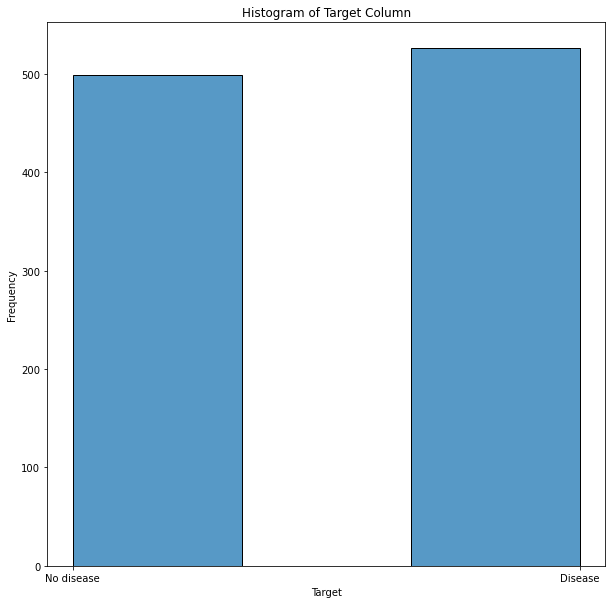

In [13]:
plt.figure(figsize=(10,10))
sns.histplot(data['target'],bins=3,edgecolor='black')
plt.title("Histogram of Target Column")
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks([0,1],['No disease','Disease'])
plt.show()

In [14]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [15]:
categorical_features

[]

We here see that there are no categorical features.
Note - Although all features in your dataset are of integer type, some of them represent discrete categories and should be treated as categorical variables for the following reasons:

Nature of the Data:

Categorical Variables: These are variables that represent discrete categories or groups, often with a limited number of unique values. Examples include sex (male/female), cp (chest pain type), and restecg (resting ECG results). These variables don't have a meaningful order or scale.
Continuous Variables: These represent measurements on a continuous scale, where the differences between values are meaningful. Examples include age, trestbps (resting blood pressure), and chol (cholesterol level).

In [16]:
#categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
categorical_features=['target']

In [17]:
continuous_features=['age','trestbps','chol','thalach','oldpeak']

### Visualize relationships for Categorical Variables

In [18]:
import seaborn as sns

In [19]:
sns.set(style="whitegrid")

In [20]:
for feature in categorical_features:
    result=data[feature].value_counts()


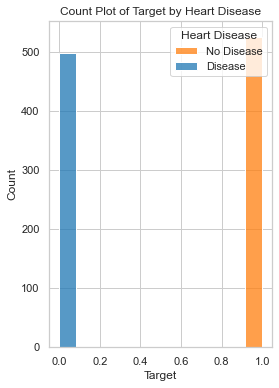

In [21]:
#Plot count plots for each categorical features
for feature in categorical_features:
    plt.figure(figsize=(4,6))
    ax = sns.histplot(data=data, x=data[feature], hue='target', multiple='stack', palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Count Plot of {feature.capitalize()} by Heart Disease')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', loc='upper right', labels=['No Disease', 'Disease'])
    plt.show()

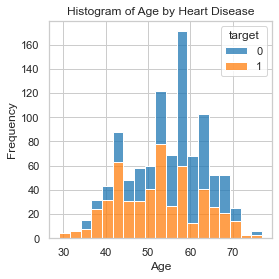

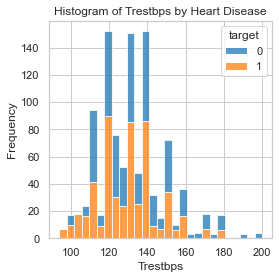

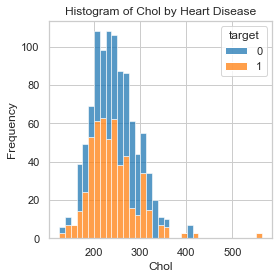

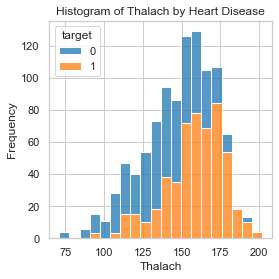

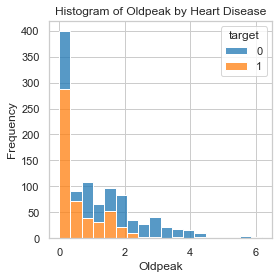

In [22]:
for feature in continuous_features:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=data, x=feature, hue='target', multiple='stack', palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Histogram of {feature.capitalize()} by Heart Disease')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()


In [23]:
corr_matrix=data.corr()

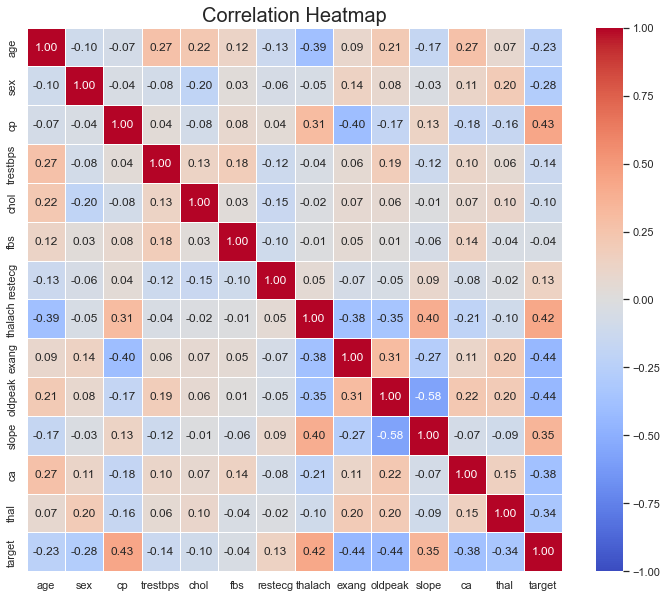

In [24]:
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add title and adjust layout
plt.title('Correlation Heatmap', size=20)
plt.show()

In [25]:
data_encoded=pd.get_dummies(data,columns=categorical_features,drop_first=True)

In [26]:
data_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Splitting features into training and test set

In [27]:
X=data.drop(['target'],axis=1)
y=data['target']

Finding best features for Model

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=14 is greater than n_features=13. All the features will be returned.
  warnings.warn(


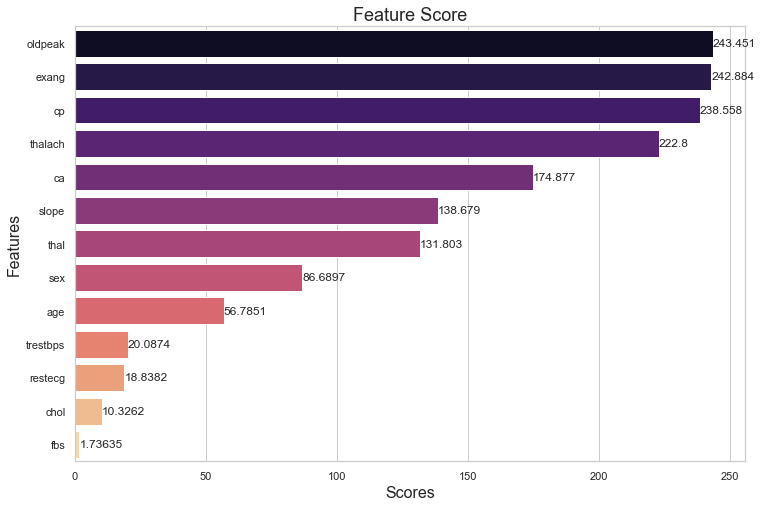

In [29]:
# Find out the best features for the model out of all features.

## Initializing SelectKBest class for finding features and applying on X and y variables
selector = SelectKBest(f_classif, k=14)
X_selected = selector.fit_transform(X,y)

## Creating list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Creating a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)


In [30]:
data = data.drop([ 'restecg', 'chol', 'fbs'], axis=1)

In [31]:
col=data.columns


In [32]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')

In [33]:
sc=StandardScaler()

In [34]:
data[col]=sc.fit_transform(data[col])
data.head()

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
lr=LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [37]:
y_pred_logistic=lr.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_logistic)

0.7853658536585366

In [39]:
clf_report=pd.DataFrame(classification_report(y_test,y_pred_logistic,output_dict=True))

In [40]:
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.845238,0.743802,0.785366,0.794520,0.794272
recall,0.696078,0.873786,0.785366,0.784932,0.785366
f1-score,0.763441,0.803571,0.785366,0.783506,0.783604
support,102.000000,103.000000,0.785366,205.000000,205.000000


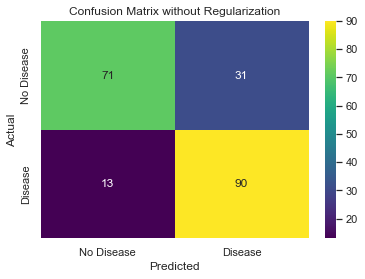

In [41]:
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix without Regularization')
plt.show()

In [42]:
cm

array([[71, 31],
       [13, 90]], dtype=int64)

In [43]:
from sklearn.linear_model import LogisticRegressionCV
#L1 regularized logistic regression
lr_l1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)
y_pred_1=lr_l1.predict(X_test)
clf_report1=pd.DataFrame(classification_report(y_test,y_pred_1,output_dict=True))

In [44]:
accuracy_score(y_test,y_pred_1)

0.7951219512195122

In [45]:
clf_report1

,0,1,accuracy,macro avg,weighted avg
precision,0.848837,0.756303,0.795122,0.802570,0.802344
recall,0.715686,0.873786,0.795122,0.794736,0.795122
f1-score,0.776596,0.810811,0.795122,0.793703,0.793787
support,102.000000,103.000000,0.795122,205.000000,205.000000


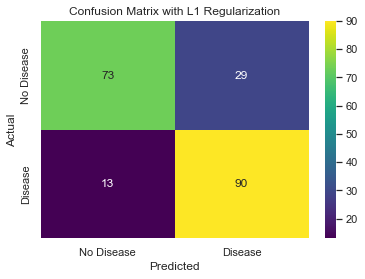

In [46]:
cm = confusion_matrix(y_test, y_pred_1)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with L1 Regularization')
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegressionCV
#L2 regularized logistic regression
lr_l2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)
y_pred_2=lr_l2.predict(X_test)
clf_report_2=pd.DataFrame(classification_report(y_test,y_pred_2,output_dict=True))

In [48]:
accuracy_score(y_test,y_pred_2)

0.7853658536585366

In [49]:
clf_report_2

,0,1,accuracy,macro avg,weighted avg
precision,0.845238,0.743802,0.785366,0.794520,0.794272
recall,0.696078,0.873786,0.785366,0.784932,0.785366
f1-score,0.763441,0.803571,0.785366,0.783506,0.783604
support,102.000000,103.000000,0.785366,205.000000,205.000000


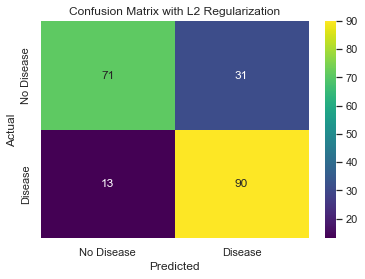

In [50]:
cm = confusion_matrix(y_test, y_pred_2)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with L2 Regularization')
plt.show()

## KNN Algorithm

In [51]:
knn=KNeighborsClassifier()

In [52]:
params_knn={'n_neighbors':[1,3,5,7,9,11], 'metric': ['euclidean', 'manhattan', 'chebyshev']}


In [53]:
grid_knn=GridSearchCV(knn,params_knn,cv=6,n_jobs=-1)

In [54]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [55]:
from sklearn.model_selection import GridSearchCV
best_knn=grid_knn.best_estimator_
y_pred_knn=best_knn.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred_knn)

0.9853658536585366

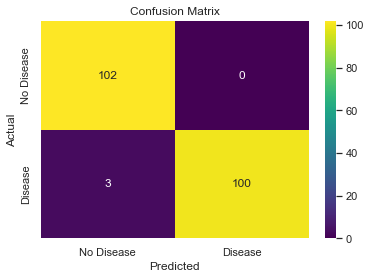

In [57]:
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [58]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf", gamma=0.5)
SVC_cl=svc.fit(X_train,y_train)
y_pred_svc=SVC_cl.predict(X_test)
SVC_cl_report=pd.DataFrame(classification_report(y_test,y_pred_svc,output_dict=True))

In [59]:
accuracy_score(y_test,y_pred_svc)

1.0

In [60]:
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,102.0,103.0,1.0,205.0,205.0


In [61]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


In [62]:
svm=SVC()

In [63]:
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')


In [64]:
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [65]:
best_svm=grid_svm.best_estimator_

In [66]:
y_pred_svm=best_svm.predict(X_test)

In [67]:
print("Best parameters found:",grid_svm.best_params_)

Best parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [68]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [69]:
accuracy_score(y_test,y_pred_svm)

1.0

In [70]:
cm3=confusion_matrix(y_test,y_pred_svm)

In [71]:
cm3

array([[102,   0],
       [  0, 103]], dtype=int64)

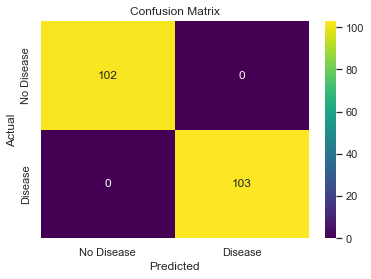

In [72]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='viridis', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()